In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### First figure: mean/confidence intervals of accuracy of the 3 different models (neural networks, random forest, svm)

TODO: needs errorbar/confidence interval on it

In [6]:
N = 50 # these values come from 50 fold cross-validation
nnAvgAcc = 0.539117659032
svmAvgAcc = 0.307720588235
rfAvgAcc = 0.616176470588

nnCI = [0.012567551632371131, 0.024571378878233352]
svmCI = [0.0079589468546452744, 0.015560890804975013]
rfCI = [0.011533418128743689, 0.022549498493604238]

nnErr = nnCI[1]-nnCI[0]
svmErr = svmCI[1]-svmCI[0]
rfErr = rfCI[1]-rfCI[0]

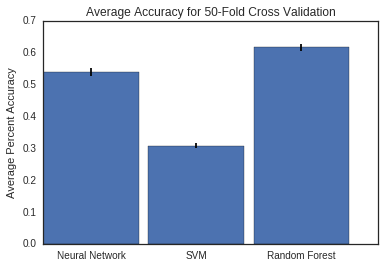

In [42]:
sns.set_style("white")
fig = plt.figure()
plt.bar([0, 0.011, 0.022], [nnAvgAcc, svmAvgAcc, rfAvgAcc], width=.01,
       yerr=[nnErr, svmErr, rfErr], ecolor='k')
plt.ylabel('Average Percent Accuracy')
plt.xticks(np.arange(.005, .03, .011), ('Neural Network', 'SVM', 'Random Forest'))
plt.title('Average Accuracy for 50-Fold Cross Validation')
plt.show()
fig.savefig('/home/jenna/Research/COPDImageAnalysis/figures/projects_02_avgAccuracy.pdf')